In [23]:
import pandas_datareader as pdr

df=pdr.get_data_tiingo('AAPL',api_key='2e28eec33283e8896877b567992c9a3f6ebfb85f')

C:\Users\Dell\AppData\Local\Temp\ipykernel_8076\1162544080.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df=pdr.get_data_tiingo('AAPL',api_key='2e28eec33283e8896877b567992c9a3f6ebfb85f')


In [24]:
df.to_csv('AAPL.csv')

In [25]:
import pandas as pd

df=pd.read_csv('AAPL.csv')

In [26]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-01-03 00:00:00+00:00,172.23,174.55,171.96,172.53,28819653,40.889783,41.440583,40.825681,40.961007,115278612,0.0,1.0
1,AAPL,2018-01-04 00:00:00+00:00,173.03,173.47,172.08,172.54,22211345,41.079714,41.184176,40.854171,40.963381,88845380,0.0,1.0
2,AAPL,2018-01-05 00:00:00+00:00,175.00,175.37,173.05,173.44,23016177,41.547419,41.635262,41.084462,41.177054,92064708,0.0,1.0
3,AAPL,2018-01-08 00:00:00+00:00,174.35,175.61,173.93,174.35,20134092,41.393100,41.692242,41.293386,41.393100,80536368,0.0,1.0
4,AAPL,2018-01-09 00:00:00+00:00,174.33,175.06,173.41,174.55,21262614,41.388352,41.561664,41.169931,41.440583,85050456,0.0,1.0


In [27]:
df1=df.reset_index()['close']

In [28]:
df1.shape

(1258,)

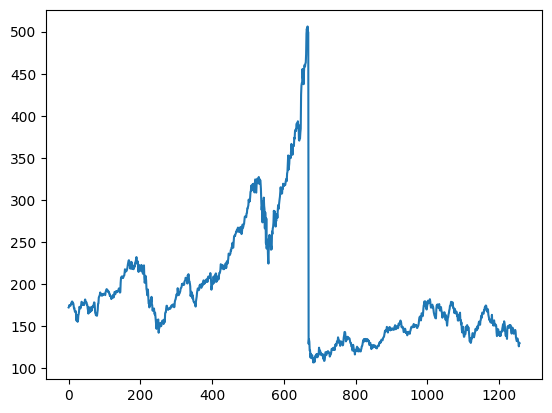

In [29]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [30]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

sc=MinMaxScaler(feature_range=(0,1))
df1=sc.fit_transform(np.array(df1).reshape(-1,1))

In [31]:
train_size=int(len(df1)*0.80)
test_size=len(df1)-train_size
train_set,test_set=df.iloc[0:train_size,:],df.iloc[train_size:len(df1),:1]

In [38]:
# convert array into dataset matrix

def create_Dataset(dataset,time_step=1):
    dataX,dataY =[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset.iloc[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset.iloc[(i+time_step),0])
    return np.array(dataX),np.array(dataY)    

In [39]:
time_step =100
x_train,y_train=create_Dataset(train_set,time_step)
x_test,y_test=create_Dataset(test_set,time_step)


In [40]:
# reshape input to be [samples, time steps, features] which is required for LSTM
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [ ]:
from keras.layers import LSTM,Dense
from keras.models import Sequential